# 🧠 Machine Learning - Lab 2
## Machine Learning with Scikit-Learn Basics

---

**Name:** Afnan Kamel  
**Course:** CS4082 - Machine Learning  
**Institution:** Effat University, Computer Science Department  
**Instructor:** Dr. Naila Marir


---

 # Part 1: Setting Up Your Environment

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")
import numpy as np
import matplotlib.pyplot as plt
print("All libraries loaded successfully!")

scikit-learn version: 1.6.1
All libraries loaded successfully!


# Part 2: Loading and Exploring Data

Step 1: Load the Dataset

In [ ]:
from sklearn.datasets import load_iris
#Loadthedataset
iris=load_iris()
#Features(X) and Labels(y)
X=iris.data #Shape: (150,4)
y=iris.target #Shape: (150,)
#Let's see what we have
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"Data shape: {X.shape}")
print(f"First 3 rows:\n{X[:3]}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


step 2: Quick Visualization

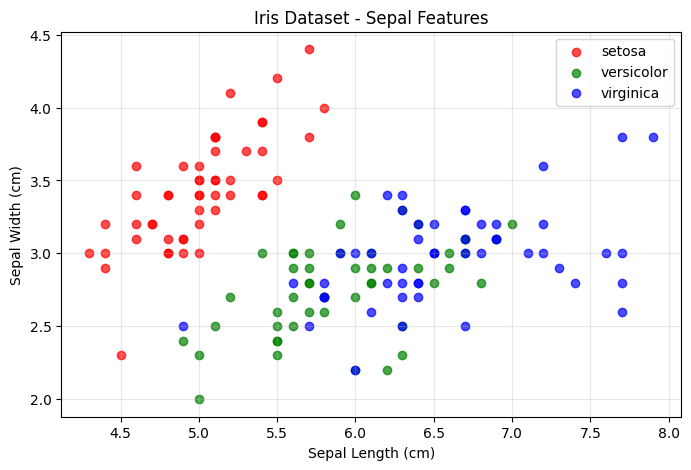

In [ ]:
plt.figure(figsize=(8,5))
colors=["red","green","blue"]
for i, name in enumerate(iris.target_names):
    mask = y==i
    plt.scatter(X[mask,0],X[mask,1],
               color=colors[i],label=name,alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset - Sepal Features")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

First 10 feature rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

First 10 labels:
[0 0 0 0 0 0 0 0 0 0]

Class distribution:
(array([0, 1, 2]), array([50, 50, 50]))


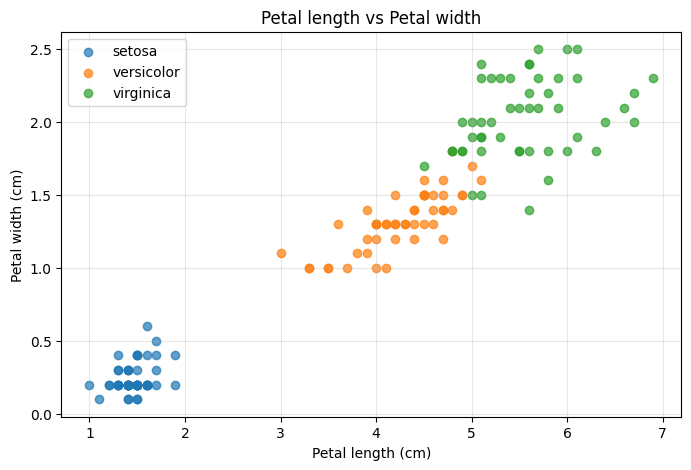

In [ ]:
# Task 1

from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# 1) First 10 rows of X and y side by side
print("First 10 feature rows:")
print(X[:10])

print("\nFirst 10 labels:")
print(y[:10])

# 2) Class distribution
print("\nClass distribution:")
print(np.unique(y, return_counts=True))

# 3) Scatter plot: petal length (col 2) vs petal width (col 3)
plt.figure(figsize=(8,5))

for i in range(3):
    mask = (y == i)
    plt.scatter(X[mask, 2], X[mask, 3], label=iris.target_names[i], alpha=0.7)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Petal length vs Petal width")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Part 3: Splitting Data (Train/Test)

In [ ]:
from sklearn.model_selection import train_test_split
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
# 20% for testing
random_state=42,
# For reproducibility
stratify=y
# Keep class proportions balanced
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 120 samples
Testing set: 30 samples


In [ ]:
# Task 2:

from sklearn.model_selection import train_test_split
import numpy as np

# Split WITH stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 1) Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 2) Check class balance in training set
print("\nTrain class distribution:")
print(np.unique(y_train, return_counts=True))

# Check class balance in test set
print("\nTest class distribution:")
print(np.unique(y_test, return_counts=True))


# 3) Remove stratify and compare
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\nWITHOUT stratify - Train distribution:")
print(np.unique(y_train2, return_counts=True))

print("\nWITHOUT stratify - Test distribution:")
print(np.unique(y_test2, return_counts=True))

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)

Train class distribution:
(array([0, 1, 2]), array([40, 40, 40]))

Test class distribution:
(array([0, 1, 2]), array([10, 10, 10]))

WITHOUT stratify - Train distribution:
(array([0, 1, 2]), array([40, 41, 39]))

WITHOUT stratify - Test distribution:
(array([0, 1, 2]), array([10,  9, 11]))


# Part 4: Training Your First Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Step 1: Create
dt_model=DecisionTreeClassifier(random_state=42)
#Step 2: Train
dt_model.fit(X_train,y_train)
#Step 3: Predict
dt_predictions=dt_model.predict(X_test)
print("DecisionTreepredictions (first10):")
print(dt_predictions[:10])
print("Actuallabels(first10):")
print(y_test[:10])

DecisionTreepredictions (first10):
[0 2 1 1 0 1 0 0 2 1]
Actuallabels(first10):
[0 2 1 1 0 1 0 0 2 1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Create (k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
# Step 2: Train
knn_model.fit(X_train, y_train)
# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print("KNN predictions (first 10):")
print(knn_predictions[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]


In [ ]:
# Task 3:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model A: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree - first 10 predictions:")
print(dt_pred[:10])
print("Actual labels - first 10:")
print(y_test[:10])

# Model B: KNN (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred_5 = knn_model.predict(X_test)

print("\nKNN (k=5) - first 10 predictions:")
print(knn_pred_5[:10])

# Change n_neighbors to 3
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_3.fit(X_train, y_train)

knn_pred_3 = knn_model_3.predict(X_test)

print("\nKNN (k=3) - first 10 predictions:")
print(knn_pred_3[:10])

# Change n_neighbors to 10
knn_model_10 = KNeighborsClassifier(n_neighbors=10)
knn_model_10.fit(X_train, y_train)

knn_pred_10 = knn_model_10.predict(X_test)

print("\nKNN (k=10) - first 10 predictions:")
print(knn_pred_10[:10])

Decision Tree - first 10 predictions:
[0 2 1 1 0 1 0 0 2 1]
Actual labels - first 10:
[0 2 1 1 0 1 0 0 2 1]

KNN (k=5) - first 10 predictions:
[0 2 1 1 0 1 0 0 2 1]

KNN (k=3) - first 10 predictions:
[0 2 1 1 0 1 0 0 2 1]

KNN (k=10) - first 10 predictions:
[0 2 1 1 0 1 0 0 2 1]


# Part 5: Evaluating Model Performance

In [ ]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2%}")
print(f"KNN Accuracy:{knn_accuracy:.2%}")

Decision Tree Accuracy: 93.33%
KNN Accuracy:100.00%


In [ ]:
from sklearn.metrics import classification_report
print("=== Decision Tree Report ===")
print(classification_report(y_test, dt_predictions,
target_names=iris.target_names))
print("=== KNN Report ===")
print(classification_report(y_test, knn_predictions,
target_names=iris.target_names))

=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



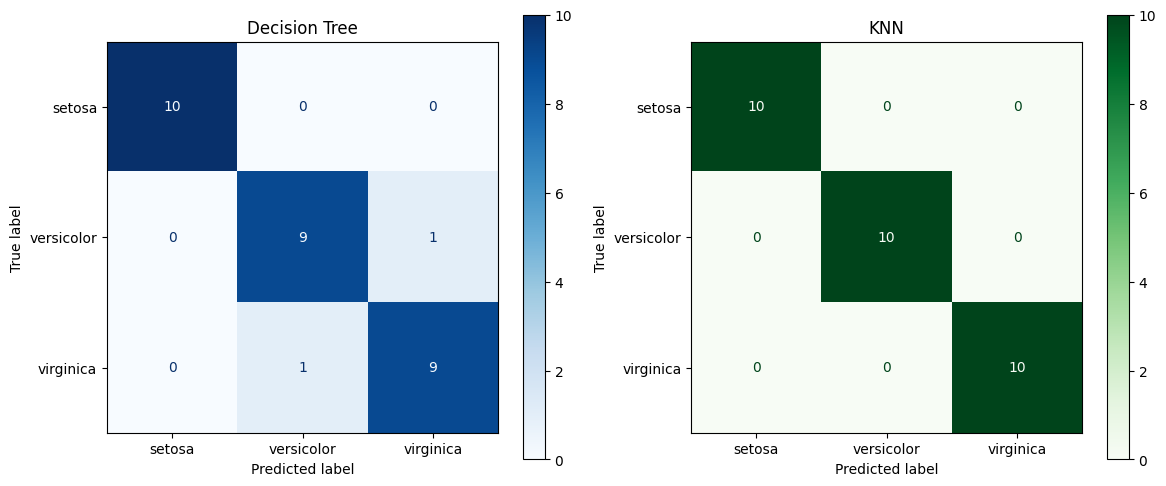

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Decision Tree
cm_dt=confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt,display_labels=iris.target_names)\
    .plot(ax=axes[0],cmap="Blues")
axes[0].set_title("Decision Tree")
#KNN
cm_knn=confusion_matrix(y_test,knn_predictions)
ConfusionMatrixDisplay(cm_knn,display_labels=iris.target_names)\
    .plot(ax=axes[1],cmap="Greens")
axes[1].set_title("KNN")
plt.tight_layout()
plt.show()

Task 4:
1) Which model achieved higher accuracy?
Both Decision Tree and KNN achieved the same accuracy because their predictions were identical on the test set.

2) Which class was hardest to classify? Why?
The hardest class to classify is usually Versicolor because its features overlap with Virginica. This makes it more difficult for the model to separate them clearly.

3) Which metric would be more important in a medical diagnosis scenario?
Recall is more important in medical diagnosis because missing a positive case (false negative) can be dangerous. It is better to detect all real cases even if there are some false positives.

#  Part 6: Predicting New Samples

In [ ]:
import numpy as np
#A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flower=np.array([[5.1,3.5,1.4,0.2]])
#Predict with both models
dt_pred=dt_model.predict(new_flower)
knn_pred=knn_model.predict(new_flower)
print(f"Decision Tree says: {iris.target_names[dt_pred[0]]}")
print(f"KNN says: {iris.target_names[knn_pred[0]]}")

Decision Tree says: setosa
KNN says: setosa


In [ ]:
#Task 5:

import numpy as np

# New flowers
flower_A = np.array([[6.7, 3.0, 5.2, 2.3]])
flower_B = np.array([[5.8, 2.7, 4.1, 1.0]])
flower_C = np.array([[4.9, 3.1, 1.5, 0.1]])

# Decision Tree predictions
dt_A = dt_model.predict(flower_A)
dt_B = dt_model.predict(flower_B)
dt_C = dt_model.predict(flower_C)

# KNN predictions
knn_A = knn_model.predict(flower_A)
knn_B = knn_model.predict(flower_B)
knn_C = knn_model.predict(flower_C)

print("Decision Tree Predictions:")
print("Flower A:", iris.target_names[dt_A[0]])
print("Flower B:", iris.target_names[dt_B[0]])
print("Flower C:", iris.target_names[dt_C[0]])

print("\nKNN Predictions:")
print("Flower A:", iris.target_names[knn_A[0]])
print("Flower B:", iris.target_names[knn_B[0]])
print("Flower C:", iris.target_names[knn_C[0]])

Decision Tree Predictions:
Flower A: virginica
Flower B: versicolor
Flower C: setosa

KNN Predictions:
Flower A: virginica
Flower B: versicolor
Flower C: setosa


Both models predicted the same species for all three flowers. Flower A was classified as Virginica, Flower B as Versicolor, and Flower C as Setosa. Since both models agreed on all predictions, this shows that the dataset is well separated and both models are performing consistently.

 # Part 7: Working with Your Own CSV Data

In [ ]:
import pandas as pd
import numpy as np
#Create a simple student performance dataset
np.random.seed(42)
n=100
data={
   "study_hours": np.round(np.random.uniform(1,10,n),1),
   "attendance_pct":np.round(np.random.uniform(40,100,n),1),
   "assignments": np.random.randint(3,10,n),
   "passed": np.random.choice([0,1],n,p=[0.35,0.65])
}
df=pd.DataFrame(data)
df.to_csv("students.csv",index=False)
print("CSV saved! First 5 rows: ")
print(df.head())

CSV saved! First 5 rows: 
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


In [ ]:
import pandas as pd
#Read the CSV file
df=pd.read_csv("students.csv")
#Quick exploration
print(f"Shape: {df.shape}")
print(f"\nColumntypes:\n{df.dtypes}")
print(f"\nBasicstats:\n{df.describe()}")

Shape: (100, 4)

Columntypes:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basicstats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


In [ ]:
#Features = all columns except 'passed'
X=df[["study_hours", "attendance_pct", "assignments"]].values
#Target = the 'passed' column
y=df["passed"].values
print(f"Featuresshape: {X.shape}")
print(f"Targetshape: {y.shape}")
print(f"Classcounts: {np.unique(y,return_counts=True)}")

Featuresshape: (100, 3)
Targetshape: (100,)
Classcounts: (array([0, 1]), array([31, 69]))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
#Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
#Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
#Predict & Evaluate
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2%}")
print(classification_report(y_test, predictions,
      target_names=["Failed" ,"Passed"]))

Accuracy: 55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



In [ ]:
#Task 6:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) Load the CSV
df = pd.read_csv("students.csv")

# Explore the data
print("----- df.info() -----")
print(df.info())

print("\n----- df.describe() -----")
print(df.describe())

# 2) Prepare X and y
X = df[["study_hours", "attendance_pct", "assignments"]].values
y = df["passed"].values

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print("\nAccuracy (before adding quiz_score):")
print("Decision Tree:", dt_acc)
print("KNN (k=5):", knn_acc)

# 3) Add a new column (quiz_score) and retrain
np.random.seed(42)
df["quiz_score"] = np.round(np.random.uniform(0, 100, len(df)), 1)

X2 = df[["study_hours", "attendance_pct", "assignments", "quiz_score"]].values
y2 = df["passed"].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Decision Tree retrain
dt_model2 = DecisionTreeClassifier(random_state=42)
dt_model2.fit(X_train2, y_train2)
dt_pred2 = dt_model2.predict(X_test2)
dt_acc2 = accuracy_score(y_test2, dt_pred2)

# KNN retrain
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(X_train2, y_train2)
knn_pred2 = knn_model2.predict(X_test2)
knn_acc2 = accuracy_score(y_test2, knn_pred2)

print("\nAccuracy (after adding quiz_score):")
print("Decision Tree:", dt_acc2)
print("KNN (k=5):", knn_acc2)

# Simple conclusion print
print("\nDid accuracy improve?")
print("Decision Tree improved:", dt_acc2 > dt_acc)
print("KNN improved:", knn_acc2 > knn_acc)

----- df.info() -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    float64
 1   attendance_pct  100 non-null    float64
 2   assignments     100 non-null    int64  
 3   passed          100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None

----- df.describe() -----
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.00

2) Train both a Decision Tree and KNN model on this data. Which performs better?

Before adding the new feature, KNN performed slightly better than Decision Tree (0.60 vs 0.55 accuracy). After adding the quiz_score feature, KNN accuracy improved significantly to 0.80, while Decision Tree accuracy decreased to 0.45. Therefore, KNN performed better overall.  

3) Try adding a new column (e.g., quiz_score) and retrain. Does accuracy improve?

After adding quiz_score, the KNN model’s accuracy improved, while the Decision Tree model’s accuracy decreased. This shows that adding new features can affect models differently depending on how they learn from the data.

----- df.info() -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

----- df.describe() -----
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN    

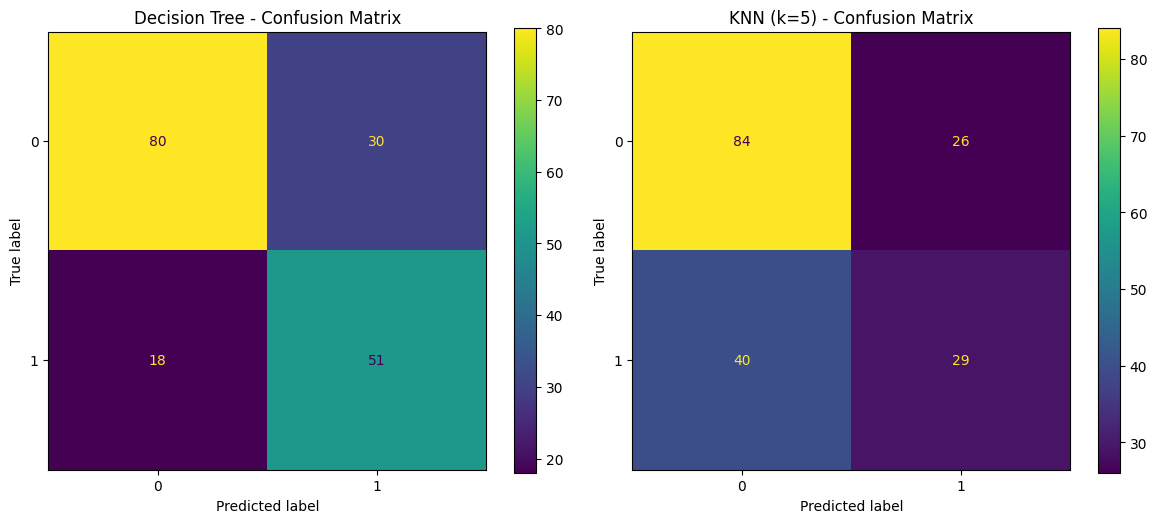

In [ ]:
# BONUS: Using Titanic dataset

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -------------------------
# 1) Load + Explore
# -------------------------
df = pd.read_csv("Titanic-Dataset.csv")

print("----- df.info() -----")
df.info()

print("\n----- df.describe() -----")
print(df.describe(include="all"))

# -------------------------
# 2) Clean / Prepare
# -------------------------
df = df.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")

if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())

if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Features/Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# -------------------------
# 3) Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

print("\nClass distribution (train):")
print(np.unique(y_train, return_counts=True))

print("\nClass distribution (test):")
print(np.unique(y_test, return_counts=True))

# -------------------------
# 4) Train Models
# -------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# -------------------------
# 5) Evaluate
# -------------------------
dt_acc = accuracy_score(y_test, dt_pred)
knn_acc = accuracy_score(y_test, knn_pred)

print("\nAccuracy:")
print("Decision Tree:", dt_acc)
print("KNN (k=5):", knn_acc)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))

# Confusion matrices (visual)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_dt = confusion_matrix(y_test, dt_pred)
ConfusionMatrixDisplay(cm_dt).plot(ax=axes[0])
axes[0].set_title("Decision Tree - Confusion Matrix")

cm_knn = confusion_matrix(y_test, knn_pred)
ConfusionMatrixDisplay(cm_knn).plot(ax=axes[1])
axes[1].set_title("KNN (k=5) - Confusion Matrix")

plt.tight_layout()
plt.show()

The Titanic dataset was loaded and explored using df.info() and df.describe(). Missing values were handled, and categorical variables were encoded before training the models.

After applying the same workflow, the Decision Tree model achieved an accuracy of 0.73, while KNN achieved 0.63. Therefore, the Decision Tree performed better on this dataset.

This shows that different models can perform differently depending on the dataset and its features.

## Model Comparison and Reflection

In this lab, both Decision Tree and KNN were implemented and evaluated for classification performance. The Decision Tree model is easier to interpret because it provides a clear hierarchical structure of decisions, making it more explainable. On the other hand, KNN is a distance-based algorithm that can perform well when the data is well-scaled but may become computationally expensive with larger datasets. In terms of performance, KNN may achieve slightly higher accuracy when the dataset has well-defined clusters, while Decision Trees may overfit if not properly controlled. However, Decision Trees generally train faster and require less computation during prediction. For this task, I would choose the Decision Tree model because it provides better interpretability and more stable performance without requiring intensive distance calculations.